<a href="https://colab.research.google.com/github/GopalSir/motive_hackathon/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import sklearn.datasets as sk_dataset

In [80]:
data = sk_dataset.load_diabetes()
learning_rate = np.float64(0.001)

In [81]:
weights = np.zeros(shape = (data['data'].shape[1],1))
bias = np.int64(0)

In [82]:
weights.shape

(10, 1)

In [83]:
def Prediction(input,weights,bias):
  return np.dot(input,weights.reshape(-1,1)) + bias

In [60]:
def Del_w(data,weights,bias,target):
  row_count = data.shape[0]
  print("Row Count: ",row_count)
  feature_count = data.shape[1]
  print("Feature Count: ",feature_count)

  sum = np.zeros(shape = (feature_count,1))

  for i in range(row_count):
    sum = sum + (target[i] - Prediction(data[i],weights,bias))*data[i].reshape(-1,1)

  return (-2/row_count)*sum


In [84]:
def Del_b(data,weights,bias,target):
  row_count = data.shape[0]
  print("Row Count: ",row_count)
  feature_count = data.shape[1]
  print("Feature Count: ",feature_count)
  sum = 0

  for i in range(row_count):
    sum = sum + (target[i] - Prediction(data[i],weights,bias))

  return (-2/row_count)*sum

In [85]:
my_del_w = Del_w(data['data'],weights,bias,data['target'])
my_del_w

Row Count:  442
Feature Count:  10


array([[-1.376394  ],
       [-0.3154541 ],
       [-4.29608715],
       [-3.23410977],
       [-1.55318757],
       [-1.27504341],
       [ 2.89206009],
       [-3.15331688],
       [-4.14541798],
       [-2.80191322]])

We will implement gradient descent from scratch.
In gradient descent, we need to find the parameters for which loss function give the minimum output.
So the the input in this case is the parameters of loss function itself. In a way, we iterate over many different loss functions possible and then settle at that parameter which lies at the bottom of the gradient.
We are using diabetes dataset.

In [86]:
my_del_b = Del_b(data['data'],weights,bias,data['target'])
my_del_b

Row Count:  442
Feature Count:  10


array([-304.26696833])

In [95]:
def gradient_descent(learning_rate):
  global weights, bias, weights_history, bias_history
  weights_history = []
  bias_history = []
  # if input_parameter_count is 7, it means we will pass 7 parameters to loss function and let it do it
  for i in range(1,1000):
    del_w = Del_w(data['data'],weights,bias,data['target'])
    del_b = Del_b(data['data'],weights,bias,data['target'])
    weights = weights - learning_rate*del_w
    bias = bias - learning_rate*del_b
    weights_history.append(weights.copy())
    bias_history.append(bias.copy())
    # print("Weights: ",weights)
    # print("Bias: ",bias)

In [96]:
gradient_descent(learning_rate=learning_rate)
print(bias)
print(weights)

Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feature Count:  10
Row Count:  442
Feat

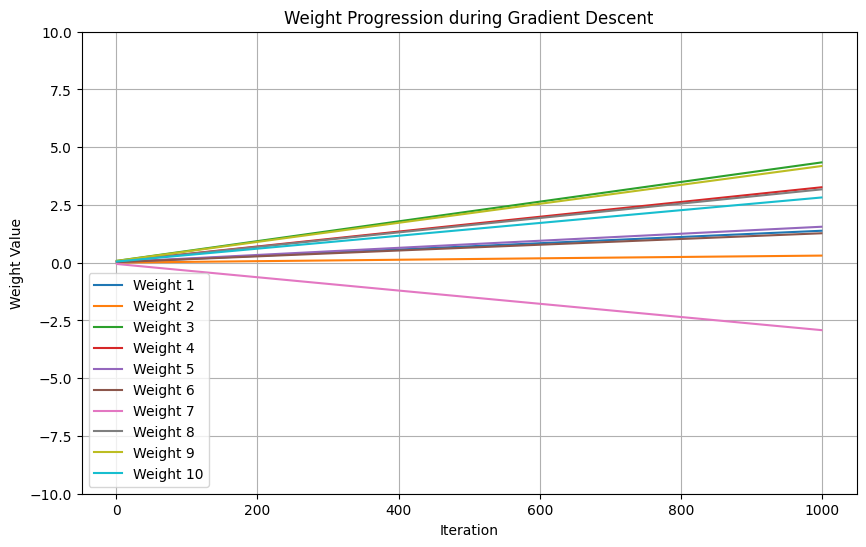

In [97]:
import matplotlib.pyplot as plt

weights_history_array = np.array(weights_history).squeeze()

plt.figure(figsize=(10, 6))
for i in range(weights_history_array.shape[1]):
    plt.plot(range(1, 1000), weights_history_array[:, i], label=f'Weight {i+1}')

plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Weight Progression during Gradient Descent')
plt.ylim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()

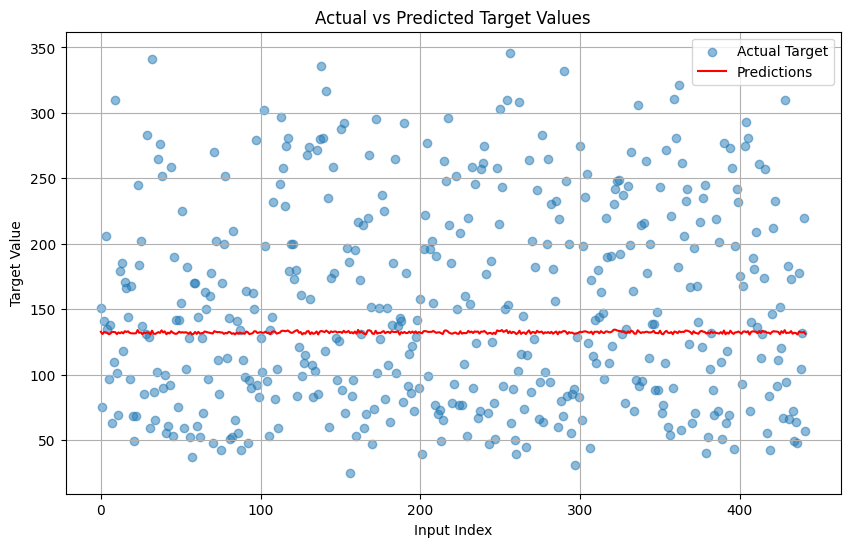

In [98]:
# prompt: Now add code to plot all the data['target'] points in y axis, for each input vector.  the input index is on x axis ,
# also ploy the prediction line using final calculated weights, for each input, on y axis itelf

plt.figure(figsize=(10, 6))
plt.scatter(range(len(data['target'])), data['target'], label='Actual Target', alpha=0.5)

# Plotting the prediction line
predictions = Prediction(data['data'], weights, bias)
plt.plot(range(len(predictions)), predictions, color='red', label='Predictions')

plt.xlabel('Input Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Target Values')
plt.legend()
plt.grid(True)
plt.show()
